<a href="https://colab.research.google.com/github/bikash119/learn_tensorflow/blob/main/tf_exam/nlp_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Character RNN

## Creating the Training Dataset

In [ ]:
import tensorflow as tf

filepath= tf.keras.utils.get_file("shakespeare_txt",
                                  origin="https://homl.info/shakespeare")
with open(filepath) as fp:
  shakespeare_tex= fp.read()

1115394/1115394 [==============================] - 0s 0us/step


In [ ]:
print(shakespeare_tex[:80])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.


## Perform Text Vectorization

In [ ]:
# Perform character text vectorization
text_vec_layer= tf.keras.layers.TextVectorization(split="character",
                                                  standardize="lower")
text_vec_layer.adapt([shakespeare_tex])

In [ ]:
sample_sentence=" I am here to learn nlp"
print(len(sample_sentence))
## Vectorize the sample sentence
text_vec_layer([sample_sentence])

23


<tf.Tensor: shape=(1, 23), dtype=int64, numpy=
array([[ 2,  7,  2,  6, 16,  2,  8,  3, 10,  3,  2,  4,  5,  2, 13,  3,
         6, 10, 11,  2, 11, 13, 24]])>

In [ ]:
tokens= text_vec_layer([shakespeare_tex])[0]
# Print some text from original text
print(f" Original Text : {shakespeare_tex[:80]} ")
# Print the vectorized text
print(f" Vectorized tokens: {tokens[:80]}")
print(len(tokens))

 Original Text : First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak. 
 Vectorized tokens: [21  7 10  9  4  2 20  7  4  7 37  3 11 25 12 23  3 21  5 10  3  2 18  3
  2 24 10  5 20  3  3 14  2  6 11 17  2 21 15 10  4  8  3 10 19  2  8  3
  6 10  2 16  3  2  9 24  3  6 26 28 12 12  6 13 13 25 12  9 24  3  6 26
 19  2  9 24  3  6 26 28]
1115394


In [ ]:
## Unique token characters in vocabulary
chars_in_vocab= text_vec_layer.get_vocabulary()
top_5_chars= chars_in_vocab[:5]
bottom_5_chars= chars_in_vocab[-5:]
print(f" Number of characters in vocab :{text_vec_layer.vocabulary_size()}")
print(f" top 5 common tokens: {top_5_chars}")
print(f" bottom 5 common tokens: {bottom_5_chars}")

 Number of characters in vocab :41
 top 5 common tokens: ['', '[UNK]', ' ', 'e', 't']
 bottom 5 common tokens: ['x', 'z', '3', '&', '$']


In [ ]:
#tokens -= 2 # Remove the 0 (pad) and 1(UNK) token
n_tokens = text_vec_layer.vocabulary_size() - 2
dataset_size= len(tokens)
print(f" dataset size : {len(tokens)}")

 dataset size : 1115394


## Perpare Dataset

In [ ]:
def to_dataset(sequence, length, shuffle=False, seed=None, batch_size=32):
  ds= tf.data.Dataset.from_tensor_slices(sequence)
  ds= ds.window(length+1, shift=1, drop_remainder=True)
  ds= ds.flat_map(lambda window_ds: window_ds.batch(length+1))
  if shuffle:
    ds= ds.shuffle(buffer_size=100_000,seed=seed)
  ds= ds.batch(batch_size)
  return ds.map(lambda window: (window[:, :-1], window[:,1:])).prefetch(1)


In [ ]:
length= 100
tf.random.set_seed(42)
train_set= to_dataset(tokens[:100_000],length=length
                      , shuffle=True,seed=42)
valid_set= to_dataset(tokens[1_000_000:1_060_000],length=length)
test_set= to_dataset(tokens[1_600_000:],length=length)

## Creating an Embedding using an Embedding Layer

In [ ]:
tf.random.set_seed(42)
embedding_layer = tf.keras.layers.Embedding(input_dim=n_tokens
                                            ,output_dim=16
                                            ,input_length=length)
embedding_layer

In [ ]:
sample_sentenc= " I am here to learn NLP"
print(f" Sample Sentenc : {sample_sentence}")
tokens_of_sample_sentence= text_vec_layer(sample_sentence)
print(f" length of tokens from TextVectorizer for sample sentence: {len(tokens_of_sample_sentence)}")
embeddings_of_sample_sentence= embedding_layer(tokens_of_sample_sentence)
print(f" Shape of Embeddings from embeding layer for sample sentence: {embeddings_of_sample_sentence.shape}")


 Sample Sentenc :  I am here to learn nlp
 length of tokens from TextVectorizer for sample sentence: 23
 Shape of Embeddings from embeding layer for sample sentence: (23, 16)


## Building and Training the Char-RNN model


In [ ]:
char_model= tf.keras.Sequential([
    embedding_layer
    ,tf.keras.layers.GRU(128,return_sequences=True)
    ,tf.keras.layers.Dense(n_tokens,activation="softmax")
])

char_model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy
                   ,optimizer=tf.keras.optimizers.Nadam()
                   ,metrics=['accuracy'])
model_ckpt= tf.keras.callbacks.ModelCheckpoint("my_shakespeare_model"
                                               ,monitor="val_accuracy"
                                               ,save_best_only=True)
history= char_model.fit(train_set
                        ,validation_data=valid_set
                        ,epochs=1
                        ,callbacks=[model_ckpt])

      1/Unknown - 25s 25s/step - loss: 3.6633 - accuracy: 0.0131

InvalidArgumentError: ignored

# Tweet Categorization
Text-based Tweets about natural disasters.

## Download and unzip the data

In [ ]:
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"
import zipfile
import os
def unzip_data(file, remove_zip_file=True):
  """
  unizp the zipped file and optionally removes the original zipefile
  """
  zipref= zipfile.ZipFile(file)
  zipref.extractall()
  os.remove(file)


--2023-08-19 11:32:57--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.96.128, 108.177.119.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.96.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  1.27MB/s    in 0.5s    

2023-08-19 11:32:58 (1.27 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
unzip_data("/content/nlp_getting_started.zip")

## Load the data as pandas dataframe

In [ ]:
import pandas as pd

train_df= pd.read_csv("/content/train.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Split the dataset into train and test

In [ ]:
from sklearn.model_selection import train_test_split
# the ouput tuple is of the format (X_train, X_valid, y_train, y_valid)
train_sent, val_sent,train_target,val_target= train_test_split(train_df["text"].to_numpy()
                                                           ,train_df["target"].to_numpy()
                                                           ,test_size=0.1
                                                           ,random_state=42)
print(f"""
training feature rows : {len(train_sent)}
training target rows : {len(train_target)}
validation feature rows: {len(val_target)}
validation target rows: {len(val_target)}
      """)


training feature rows : 6851
training target rows : 6851
validation feature rows: 762
validation target rows: 762
      


## Text Vectorization
Convert the text to numbers

In [ ]:
import tensorflow as tf
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer= tf.keras.layers.TextVectorization(max_tokens=max_vocab_length
                                                  ,output_sequence_length=max_length
                                                  )
text_vectorizer.adapt(train_sent)

import random
random_sentence= random.choice(train_sent)
print(f" Random Sentence from training set :\n {random_sentence}\n")
vectorized_random_sentence= text_vectorizer(random_sentence)
print(f" Vectorized form of random sentence : \n { vectorized_random_sentence}")

 Random Sentence from training set :
 Rite now man a tlk widout nuh curfew long side Aka cum fi steal di show itz a rubbery di whole a dem fi knw... Sound it *music*

 Vectorized form of random sentence : 
 [9045   49   96    3 7482 6727    1  365  514  789 1912 3069 5590 4518
 1870]


In [ ]:
print(f" Size of the vocabulary : {text_vectorizer.vocabulary_size()}")

 Size of the vocabulary : 10000


## Model Metrics function
Function to evaluate a model accuracy, f1 ,precision, recall


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

## Modelling a text dataset

### Naive Bayes ( Baseline )

In [ ]:
# Build the model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0= Pipeline([
    ("tfidf",TfidfVectorizer())
    ,("clf",MultinomialNB())
])

# Fit the model
model_0.fit(train_sent,train_target)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Score the model
model_0_results= model_0.score(val_sent,val_target)
print(f" Accuracy from baseline model : {model_0_results*100:.3f}%")

 Accuracy from baseline model : 77.822%


In [ ]:
# Make predictions
model_0_preds= model_0.predict(val_sent)

print(f" Target Labels : {val_target[:10]}")
import numpy as np

np.isclose(val_target[:10],model_0_preds[:10])

 Target Labels : [1 0 1 0 0 0 1 1 0 1]


array([False,  True, False,  True,  True,  True, False, False,  True,
        True])

In [ ]:
baseline_results= calculate_results(val_target,model_0_preds)
baseline_results

{'accuracy': 77.82152230971128,
 'precision': 0.792992256322435,
 'recall': 0.7782152230971129,
 'f1': 0.7703527809038113}

### Dense Model (Model 1)


####  Sequential API

##### Embedding Layer
This will create learnable embeddings for our text

In [ ]:
# input_dim= vocabulary size
# output_dim= size of the vectors for each element in vocabulary
# input_length= Length of input sequences, when it is constant
embedding_layer= tf.keras.layers.Embedding(input_dim=max_vocab_length
                                           ,output_dim=128
                                           ,input_length=max_length)

import random
random_sentence= random.choice(train_sent)
print(f" Random Sentence from training set :\n {random_sentence}")

vectorized_random_sentence= text_vectorizer(random_sentence)
print(f" \nVectorized form of random sentence : \n { vectorized_random_sentence}")

embeddings_of_sample_sentence= embedding_layer(vectorized_random_sentence)
print(f" \nEmbeddings random sentence : \n { embeddings_of_sample_sentence}")
print(f" \n Shape of embeddings : {embeddings_of_sample_sentence.shape}")

 Random Sentence from training set :
 Plains All American Pipeline company may have spilled 40% more crude oil than previously estimated #KSBYNews @lilitan http://t.co/PegibIqk2w
 
Vectorized form of random sentence : 
 [2346   37  749 2810 1423  123   24 4540  426   50 5817  226   78 2795
 2487]
 
Embeddings random sentence : 
 [[ 1.9179892e-02 -2.6437594e-02  1.0343887e-02 ...  4.4423763e-02
  -2.5162911e-02  1.1163663e-02]
 [-1.8507995e-02  4.0212635e-02 -2.2563184e-02 ...  6.8891793e-05
   3.6237244e-02  4.7587562e-02]
 [ 3.9323892e-02 -1.3888050e-02 -1.6104043e-02 ... -1.6352378e-02
   2.3923766e-02 -4.9159683e-02]
 ...
 [ 2.3529615e-02  6.4125285e-03 -3.6846757e-02 ...  3.9565396e-02
  -2.7941585e-02  1.8282685e-02]
 [-1.6099893e-02  1.2133300e-02 -2.7028287e-02 ... -1.4334403e-02
  -1.2395464e-02 -7.4585080e-03]
 [ 1.9370172e-02  2.2209410e-02 -2.1248985e-02 ...  2.2221629e-02
  -3.0166626e-02 -2.7909542e-02]]
 
 Shape of embeddings : (15, 128)


##### Build , Train & Evaluate Model

In [ ]:
tf.random.set_seed(42)
# Build the model using Sequential API
import tensorflow as tf
from tensorflow.keras import layers
model_1_seq= tf.keras.Sequential([
    layers.Input(shape=(1,),dtype="string")
    ,text_vectorizer
    ,embedding_layer
    ,layers.GlobalAveragePooling1D()
    ,layers.Dense(1,activation="sigmoid")
])
model_1_seq.compile(loss=tf.keras.losses.binary_crossentropy
                    ,optimizer=tf.keras.optimizers.Adam()
                    ,metrics=["accuracy"])
model_1_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
model_1_seq_hist= model_1_seq.fit(train_sent,train_target
                                  ,validation_data=(val_sent,val_target)
                                  ,epochs=3)

Epoch 1/3
215/215 [==============================] - 12s 39ms/step - loss: 0.6118 - accuracy: 0.6922 - val_loss: 0.5416 - val_accuracy: 0.7651
Epoch 2/3
215/215 [==============================] - 9s 41ms/step - loss: 0.4398 - accuracy: 0.8184 - val_loss: 0.4834 - val_accuracy: 0.7913
Epoch 3/3
215/215 [==============================] - 5s 24ms/step - loss: 0.3452 - accuracy: 0.8613 - val_loss: 0.4752 - val_accuracy: 0.7913


In [ ]:
# Evaluate the model
model_1_seq.evaluate(val_sent,val_target)

24/24 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.7913


[0.475195974111557, 0.7913385629653931]

In [ ]:
# Do Prediction
model_1_seq_preds_proba= model_1_seq.predict(val_sent)
model_1_seq_preds= tf.squeeze(tf.round(model_1_seq_preds_proba))

24/24 [==============================] - 0s 2ms/step


In [ ]:
model_1_seq_results= calculate_results(y_true=val_target
                  ,y_pred=model_1_seq_preds)
model_1_seq_results

{'accuracy': 79.13385826771653,
 'precision': 0.7940380463147858,
 'recall': 0.7913385826771654,
 'f1': 0.7883649974287202}

#### Functional API

##### Embedding Layer
This will create learnable embeddings for our text

In [ ]:
# input_dim= vocabulary size
# output_dim= size of the vectors for each element in vocabulary
# input_length= Length of input sequences, when it is constant
embedding_layer= tf.keras.layers.Embedding(input_dim=max_vocab_length
                                           ,output_dim=128
                                           ,input_length=max_length)

import random
random_sentence= random.choice(train_sent)
print(f" Random Sentence from training set :\n {random_sentence}")

vectorized_random_sentence= text_vectorizer(random_sentence)
print(f" \nVectorized form of random sentence : \n { vectorized_random_sentence}")

embeddings_of_sample_sentence= embedding_layer(vectorized_random_sentence)
print(f" \nEmbeddings random sentence : \n { embeddings_of_sample_sentence}")
print(f" \n Shape of embeddings : {embeddings_of_sample_sentence.shape}")

 Random Sentence from training set :
 Deal of The Day : http://t.co/US0qQqhQVj Brand New DSERIALPCILP Lava Computer PCI Bus Dual Serial 16550 Board  #eÛ_ http://t.co/l0b14SJ7JB
 
Vectorized form of random sentence : 
 [ 742    6    2  104    1 4065   52    1  548 1882 9898  399 5712 2302
    1]
 
Embeddings random sentence : 
 [[ 0.00579425 -0.01881685  0.01084379 ... -0.04425148 -0.01631197
  -0.01452919]
 [-0.0004011   0.01373049  0.01036546 ... -0.00883912  0.04015097
  -0.00120687]
 [-0.04657028  0.04941318  0.02759318 ...  0.00564593  0.03187138
   0.00503999]
 ...
 [-0.04196518  0.00880944  0.0421267  ...  0.03120511 -0.01370822
   0.04760244]
 [ 0.01991342  0.04102521 -0.04297955 ...  0.02384598  0.03172808
  -0.0343469 ]
 [ 0.04051781 -0.00637474 -0.0339998  ... -0.02229761  0.04571961
   0.00788049]]
 
 Shape of embeddings : (15, 128)


##### Build , Train, Evaluate Model

In [ ]:
tf.random.set_seed(42)
import tensorflow as tf
from tensorflow.keras import layers

inputs= layers.Input(shape=(1,), dtype="string")
x= text_vectorizer(inputs)
x= embedding_layer(x)
x= layers.GlobalAveragePooling1D(name="globalavgpooling")(x)
outputs= layers.Dense(1,activation="sigmoid",name="dense")(x)
model_1_func= tf.keras.Model(inputs=inputs
                             ,outputs= outputs
                             ,name="dense_model_1_func")

model_1_func.compile(loss=tf.keras.losses.binary_crossentropy
                     ,optimizer=tf.keras.optimizers.Adam()
                     ,metrics=["accuracy"])

model_1_func.summary()

Model: "dense_model_1_func"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 globalavgpooling (GlobalAve  (None, 128)              0         
 ragePooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,

In [ ]:
model_1_func_hist= model_1_func.fit(train_sent,train_target
                                    ,validation_data=(val_sent,val_target)
                                    ,epochs=3)

Epoch 1/3
215/215 [==============================] - 5s 22ms/step - loss: 0.6095 - accuracy: 0.6938 - val_loss: 0.5399 - val_accuracy: 0.7664
Epoch 2/3
215/215 [==============================] - 4s 17ms/step - loss: 0.4381 - accuracy: 0.8186 - val_loss: 0.4830 - val_accuracy: 0.7874
Epoch 3/3
215/215 [==============================] - 4s 17ms/step - loss: 0.3441 - accuracy: 0.8621 - val_loss: 0.4752 - val_accuracy: 0.7874


In [ ]:
# Evaluate the model
model_1_func.evaluate(val_sent,val_target)

24/24 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.7874


[0.4752333462238312, 0.787401556968689]

In [ ]:
model_1_func_proba= model_1_func.predict(val_sent)
model_1_func_preds= tf.squeeze(tf.round(model_1_func_proba))


24/24 [==============================] - 0s 2ms/step


In [ ]:
model_1_func_results= calculate_results(y_true=val_target,y_pred=model_1_func_preds)
model_1_func_results

{'accuracy': 78.74015748031496,
 'precision': 0.7897763444463061,
 'recall': 0.7874015748031497,
 'f1': 0.7844490087488502}

### Recurrent Neural Network (LSTM)

#### Sequential API

##### Embedding Layer

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
# Since the embeddings are learnable we will have to create the embedding for every
# model
embedding_layer_rnn= layers.Embedding(input_dim=max_vocab_length
                                      ,output_dim=128
                                      ,input_length=max_length)

##### Build, Train, Evaluate the model

In [ ]:
# Build the model
tf.random.set_seed(42)
model_2_seq= tf.keras.Sequential([
    layers.Input(shape=(1,),dtype="string")
    ,text_vectorizer
    ,embedding_layer_rnn
    ,layers.LSTM(64)
    ,layers.Dense(1,activation="sigmoid")
])
model_2_seq.compile(loss=tf.keras.losses.binary_crossentropy
                    ,optimizer=tf.keras.optimizers.Adam()
                    ,metrics=["accuracy"])
model_2_seq.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
model_2_seq_hist= model_2_seq.fit(train_sent,train_target
                                  ,validation_data=(val_sent,val_target)
                                  ,epochs=3)

Epoch 1/3
215/215 [==============================] - 11s 39ms/step - loss: 0.5101 - accuracy: 0.7446 - val_loss: 0.4673 - val_accuracy: 0.7927
Epoch 2/3
215/215 [==============================] - 7s 31ms/step - loss: 0.3135 - accuracy: 0.8711 - val_loss: 0.5219 - val_accuracy: 0.7848
Epoch 3/3
215/215 [==============================] - 8s 35ms/step - loss: 0.2162 - accuracy: 0.9204 - val_loss: 0.5348 - val_accuracy: 0.7690


In [ ]:
# Evaluate the model
model_2_seq.evaluate(val_sent,val_target)

24/24 [==============================] - 0s 6ms/step - loss: 0.5348 - accuracy: 0.7690


[0.5348157286643982, 0.7690288424491882]

In [ ]:
# Do prediction
model_2_pred_proba= model_2_seq.predict(val_sent)
model_2_preds= tf.squeeze(tf.round(model_2_pred_proba))

24/24 [==============================] - 1s 5ms/step


In [ ]:
# Calculate results
model_2_seq_results= calculate_results(y_true=val_target,y_pred=model_2_preds)
model_2_seq_results

{'accuracy': 76.9028871391076,
 'precision': 0.7699148365947928,
 'recall': 0.7690288713910761,
 'f1': 0.7663045965408172}

#### Functional API

##### Embedding Layer

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

embedding_layer_rnn2= layers.Embedding(input_dim=max_vocab_length
                                       ,output_dim=128
                                       ,input_length=25)

##### Build, Train & Evaluate

In [ ]:
## Build the model
tf.random.set_seed(42)
inputs= layers.Input(shape=(1,),dtype="string")
x= text_vectorizer(inputs)
x= embedding_layer_rnn2(x)
x= layers.LSTM(64)(x)
outputs= layers.Dense(1,activation="sigmoid")(x)
model_2_func= tf.keras.Model(inputs= inputs
                             ,outputs=outputs
                             ,name="model_2_rnn")

model_2_func.compile(loss=tf.keras.losses.binary_crossentropy
                     ,optimizer=tf.keras.optimizers.Adam()
                     ,metrics=["accuracy"])

model_2_func.summary()

Model: "model_2_rnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_____________________________________________

In [ ]:
# Train the model
model_2_func_hist= model_2_func.fit(train_sent,train_target
                                    ,validation_data=(val_sent,val_target)
                                    ,epochs=3)

Epoch 1/3
215/215 [==============================] - 11s 39ms/step - loss: 0.5157 - accuracy: 0.7446 - val_loss: 0.4650 - val_accuracy: 0.8005
Epoch 2/3
215/215 [==============================] - 7s 34ms/step - loss: 0.3158 - accuracy: 0.8707 - val_loss: 0.5213 - val_accuracy: 0.7966
Epoch 3/3
215/215 [==============================] - 7s 33ms/step - loss: 0.2174 - accuracy: 0.9206 - val_loss: 0.5199 - val_accuracy: 0.7730


In [ ]:
# Evaluate the model
model_2_func.evaluate(val_sent,val_target)

24/24 [==============================] - 0s 6ms/step - loss: 0.5199 - accuracy: 0.7730


[0.5199021100997925, 0.7729659080505371]

In [ ]:
# Predict
model_2_func_preds_proba= model_2_func.predict(val_sent)
model_2_func_preds= tf.squeeze(tf.round(model_2_func_preds_proba))

24/24 [==============================] - 1s 5ms/step


In [ ]:
# Calculate results
model_2_func_results= calculate_results(y_true=val_target,y_pred=model_2_func_preds)
model_2_func_results

{'accuracy': 77.29658792650919,
 'precision': 0.775551897614644,
 'recall': 0.7729658792650919,
 'f1': 0.7693919120824418}

### Recurrent Neural Network (GRU)

#### Sequential API

##### Embedding Layer

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
# Since the embeddings are learnable we will have to create the embedding for every
# model
embedding_layer_gru= layers.Embedding(input_dim=max_vocab_length
                                      ,output_dim=128
                                      ,input_length=max_length)

##### Build, Train, Evaluate the model

In [ ]:
# Build the model
tf.random.set_seed(42)
model_3_seq= tf.keras.Sequential([
    layers.Input(shape=(1,),dtype="string")
    ,text_vectorizer
    ,embedding_layer_gru
    ,layers.GRU(64)
    ,layers.Dense(1,activation="sigmoid")
])
model_3_seq.compile(loss=tf.keras.losses.binary_crossentropy
                    ,optimizer=tf.keras.optimizers.Adam()
                    ,metrics=["accuracy"])
model_3_seq.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_4 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
model_3_seq_hist= model_3_seq.fit(train_sent,train_target
                                  ,validation_data=(val_sent,val_target)
                                  ,epochs=3)

Epoch 1/3
215/215 [==============================] - 12s 35ms/step - loss: 0.5361 - accuracy: 0.7234 - val_loss: 0.4679 - val_accuracy: 0.8005
Epoch 2/3
215/215 [==============================] - 8s 37ms/step - loss: 0.3205 - accuracy: 0.8697 - val_loss: 0.5130 - val_accuracy: 0.7795
Epoch 3/3
215/215 [==============================] - 7s 32ms/step - loss: 0.2190 - accuracy: 0.9177 - val_loss: 0.5168 - val_accuracy: 0.7756


In [ ]:
# Evaluate the model
model_3_seq.evaluate(val_sent,val_target)

24/24 [==============================] - 0s 5ms/step - loss: 0.5168 - accuracy: 0.7756


[0.51679927110672, 0.7755905389785767]

In [ ]:
# Do prediction
model_3_pred_proba= model_3_seq.predict(val_sent)
model_3_preds= tf.squeeze(tf.round(model_3_pred_proba))

24/24 [==============================] - 1s 5ms/step


In [ ]:
# Calculate results
model_3_seq_results= calculate_results(y_true=val_target,y_pred=model_3_preds)
model_3_seq_results

{'accuracy': 77.55905511811024,
 'precision': 0.7776491925902075,
 'recall': 0.7755905511811023,
 'f1': 0.7723925444044727}

#### Functional API

##### Embedding Layer

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

embedding_layer_gru2= layers.Embedding(input_dim=max_vocab_length
                                       ,output_dim=128
                                       ,input_length=25)

##### Build, Train & Evaluate

In [ ]:
## Build the model
tf.random.set_seed(42)
inputs= layers.Input(shape=(1,),dtype="string")
x= text_vectorizer(inputs)
x= embedding_layer_gru2(x)
x= layers.LSTM(64)(x)
outputs= layers.Dense(1,activation="sigmoid")(x)
model_3_func= tf.keras.Model(inputs= inputs
                             ,outputs=outputs
                             ,name="model_3_gru")

model_3_func.compile(loss=tf.keras.losses.binary_crossentropy
                     ,optimizer=tf.keras.optimizers.Adam()
                     ,metrics=["accuracy"])

model_3_func.summary()

Model: "model_3_gru"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_____________________________________________

In [ ]:
# Train the model
model_3_func_hist= model_3_func.fit(train_sent,train_target
                                    ,validation_data=(val_sent,val_target)
                                    ,epochs=3)

Epoch 1/3
215/215 [==============================] - 11s 36ms/step - loss: 0.5149 - accuracy: 0.7441 - val_loss: 0.4649 - val_accuracy: 0.7927
Epoch 2/3
215/215 [==============================] - 9s 44ms/step - loss: 0.3148 - accuracy: 0.8720 - val_loss: 0.5288 - val_accuracy: 0.7887
Epoch 3/3
215/215 [==============================] - 8s 37ms/step - loss: 0.2126 - accuracy: 0.9237 - val_loss: 0.5340 - val_accuracy: 0.7690


In [ ]:
# Evaluate the model
model_3_func.evaluate(val_sent,val_target)

24/24 [==============================] - 0s 6ms/step - loss: 0.5340 - accuracy: 0.7690


[0.5340465307235718, 0.7690288424491882]

In [ ]:
# Predict
model_3_func_preds_proba= model_3_func.predict(val_sent)
model_3_func_preds= tf.squeeze(tf.round(model_3_func_preds_proba))

24/24 [==============================] - 1s 6ms/step


In [ ]:
# Calculate results
model_3_func_results= calculate_results(y_true=val_target,y_pred=model_3_func_preds)
model_3_func_results

{'accuracy': 76.9028871391076,
 'precision': 0.769694818612314,
 'recall': 0.7690288713910761,
 'f1': 0.7664584533150937}

### Model 4: Bidirectional RNN

#### Sequential API

##### Emdedding Layer

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
embedding_layer_birnn= layers.Embedding(input_dim=max_vocab_length
                                        ,output_dim=128
                                        ,input_length=max_length)

##### Build, Train, Evaluate Model

In [ ]:
# Build the model
model_4_seq= tf.keras.Sequential([
    layers.Input(shape=(1,),dtype="string")
    ,text_vectorizer
    ,embedding_layer_birnn
    ,layers.Bidirectional(layers.LSTM(64))
    ,layers.Dense(1,activation="sigmoid")
])
model_4_seq.compile(loss=tf.keras.losses.binary_crossentropy
                    ,optimizer=tf.keras.optimizers.Adam()
                    ,metrics=["accuracy"])

model_4_seq.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_6 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,378,945
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
model_4_seq_hist= model_4_seq.fit(train_sent,train_target
                                  ,validation_data=(val_sent,val_target)
                                  ,epochs=3)

Epoch 1/3
215/215 [==============================] - 17s 52ms/step - loss: 0.5112 - accuracy: 0.7449 - val_loss: 0.4632 - val_accuracy: 0.8031
Epoch 2/3
215/215 [==============================] - 10s 48ms/step - loss: 0.3136 - accuracy: 0.8708 - val_loss: 0.4901 - val_accuracy: 0.7887
Epoch 3/3
215/215 [==============================] - 10s 48ms/step - loss: 0.2093 - accuracy: 0.9219 - val_loss: 0.5516 - val_accuracy: 0.7769


In [ ]:
# evaluate the model
model_4_seq.evaluate(val_sent,val_target)

24/24 [==============================] - 0s 8ms/step - loss: 0.5516 - accuracy: 0.7769


[0.5515688061714172, 0.7769029140472412]

In [ ]:
# Predict
model_4_seq_pred_proba= model_4_seq.predict(val_sent)
model_4_seq_pred= tf.squeeze(tf.round(model_4_seq_pred_proba))

24/24 [==============================] - 1s 8ms/step


In [ ]:
# Calculate result
model_4_seq_results= calculate_results(y_true=val_target,y_pred=model_4_seq_pred)
model_4_seq_results

{'accuracy': 77.69028871391076,
 'precision': 0.7833110923960127,
 'recall': 0.7769028871391076,
 'f1': 0.7718140166956104}

#### Functional API

##### Embedding Layer

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
embedding_layer_birnn2= layers.Embedding(input_dim=max_vocab_length
                                        ,output_dim= 128
                                        ,input_length=max_length)

##### Train, Build & Evaluate Model

In [ ]:
# Build the model
inputs= layers.Input(shape=(1,),dtype="string")
x= text_vectorizer(inputs)
x= embedding_layer_birnn2(x)
x= layers.Bidirectional(layers.LSTM(64))(x)
outputs= layers.Dense(1,activation="sigmoid")(x)
model_4_func= tf.keras.Model(inputs=inputs
                             ,outputs=outputs
                             ,name="model_4_bidirectional_birnn2")

model_4_func.compile(loss=tf.keras.losses.binary_crossentropy
                     ,optimizer=tf.keras.optimizers.Adam()
                     ,metrics=["accuracy"])

model_4_func.summary()

Model: "model_4_bidirectional_birnn2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_7 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable para

In [ ]:
# Train the model
model_4_func_hist= model_4_func.fit(train_sent,train_target
                                    ,validation_data=(val_sent,val_target)
                                    ,epochs=3)

Epoch 1/3
215/215 [==============================] - 16s 52ms/step - loss: 0.5101 - accuracy: 0.7486 - val_loss: 0.4630 - val_accuracy: 0.8005
Epoch 2/3
215/215 [==============================] - 11s 50ms/step - loss: 0.3128 - accuracy: 0.8718 - val_loss: 0.4916 - val_accuracy: 0.7887
Epoch 3/3
215/215 [==============================] - 11s 52ms/step - loss: 0.2072 - accuracy: 0.9257 - val_loss: 0.5439 - val_accuracy: 0.7795


In [ ]:
# Evaluate
model_4_func.evaluate(val_sent,val_target)

24/24 [==============================] - 0s 8ms/step - loss: 0.5439 - accuracy: 0.7795


[0.5439496636390686, 0.7795275449752808]

In [ ]:
# Predict
model_4_func_pred_proba= model_4_func.predict(val_sent)
model_4_func_pred= tf.squeeze(tf.round(model_4_func_pred_proba))

24/24 [==============================] - 2s 12ms/step


In [ ]:
# Calculate results
model_4_func_results= calculate_results(y_true=val_target,y_pred=model_4_func_pred)
model_4_func_results

{'accuracy': 77.95275590551181,
 'precision': 0.782963195548265,
 'recall': 0.7795275590551181,
 'f1': 0.7758009523839113}

### Model 5: Conv1D

#### Sequential API

##### Embedding Layer

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
embedding_layer_conv1d= layers.Embedding(input_dim=max_vocab_length
                                         ,output_dim=128
                                         ,input_length=max_length)

##### Build, Train and Evaluate model

In [ ]:
# Build Model
model_5_seq= tf.keras.Sequential([
    layers.Input(shape=(1,),dtype="string")
    ,text_vectorizer
    ,embedding_layer_conv1d
    ,layers.Conv1D(filters=32,kernel_size=5,activation="relu")
    ,layers.GlobalMaxPool1D()
    ,layers.Dense(1,activation="sigmoid")
])

model_5_seq.compile(loss=tf.keras.losses.binary_crossentropy
                    ,optimizer=tf.keras.optimizers.Adam()
                    ,metrics=["accuracy"])

model_5_seq.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_8 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,300,545
Trainable params: 1,300,545
No

In [ ]:
# Train the model
model_5_seq_hist= model_5_seq.fit(train_sent,train_target
                                  ,validation_data=(val_sent,val_target)
                                  ,epochs=3)

Epoch 1/3
215/215 [==============================] - 6s 22ms/step - loss: 0.5737 - accuracy: 0.7008 - val_loss: 0.4826 - val_accuracy: 0.7861
Epoch 2/3
215/215 [==============================] - 4s 20ms/step - loss: 0.3446 - accuracy: 0.8565 - val_loss: 0.4991 - val_accuracy: 0.7690
Epoch 3/3
215/215 [==============================] - 5s 24ms/step - loss: 0.2120 - accuracy: 0.9218 - val_loss: 0.5829 - val_accuracy: 0.7520


In [ ]:
# Evaluate the model
model_5_seq.evaluate(val_sent,val_target)

24/24 [==============================] - 0s 4ms/step - loss: 0.5829 - accuracy: 0.7520


[0.5828826427459717, 0.751968502998352]

In [ ]:
# Predict
model_5_seq_pred_proba= model_5_seq.predict(val_sent)
model_5_seq_pred= tf.squeeze(tf.round(model_5_seq_pred_proba))

24/24 [==============================] - 0s 3ms/step


In [ ]:
# Calculate results
model_5_seq_results= calculate_results(y_true=val_target, y_pred=model_5_seq_pred)
model_5_seq_results

{'accuracy': 75.19685039370079,
 'precision': 0.7510902920793296,
 'recall': 0.7519685039370079,
 'f1': 0.7508333353554226}

#### Functional API

##### Embedding Layer

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

embedding_layer_conv1d2= layers.Embedding(input_dim=max_vocab_length
                                          ,output_dim=128
                                          ,input_length=max_length)

##### Build, Train and Evaluate Model

In [ ]:
# Build the model
inputs= layers.Input(shape=(1,), dtype="string")
x= text_vectorizer(inputs)
x= embedding_layer(x)
x= layers.Conv1D(filters=32,kernel_size=5,activation="relu")(x)
x= layers.GlobalMaxPool1D()(x)
outputs= layers.Dense(1,activation="sigmoid")(x)
model_5_func= tf.keras.Model(inputs=inputs
                             ,outputs=outputs
                             ,name="model_5_func_conv1d")

model_5_func.compile(loss=tf.keras.losses.binary_crossentropy
                     ,optimizer=tf.keras.optimizers.Adam()
                     ,metrics=["accuracy"])

model_5_func.summary()

Model: "model_5_func_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_8 (Dense)             (None, 1)         

In [ ]:
# Train the model
model_5_func_hist= model_5_func.fit(train_sent,train_target
                                    ,validation_data=(val_sent,val_target)
                                    ,epochs=3)

Epoch 1/3
215/215 [==============================] - 6s 21ms/step - loss: 0.2964 - accuracy: 0.8829 - val_loss: 0.5539 - val_accuracy: 0.7782
Epoch 2/3
215/215 [==============================] - 5s 24ms/step - loss: 0.2247 - accuracy: 0.9111 - val_loss: 0.5978 - val_accuracy: 0.7598
Epoch 3/3
215/215 [==============================] - 4s 19ms/step - loss: 0.1692 - accuracy: 0.9349 - val_loss: 0.6697 - val_accuracy: 0.7730


In [ ]:
# Evaluate model
model_5_func.evaluate(val_sent,val_target)

24/24 [==============================] - 0s 3ms/step - loss: 0.6697 - accuracy: 0.7730


[0.6697019934654236, 0.7729659080505371]

In [ ]:
# Predict
model_5_func_pred_proba= model_5_func.predict(val_sent)
model_5_func_pred= tf.squeeze(tf.round(model_5_func_pred_proba))

24/24 [==============================] - 0s 3ms/step


In [ ]:
# Calculate results
model_5_func_results= calculate_results(y_true=val_target,y_pred=model_5_func_pred)
model_5_func_results

{'accuracy': 77.29658792650919,
 'precision': 0.7724168295590069,
 'recall': 0.7729658792650919,
 'f1': 0.771700874480935}

### Pretrained Embedding

#### Sequential API

##### Embedding layer

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_hub as hub
use_embedding= hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embedding_layer_pretrained= hub.KerasLayer(handle="https://tfhub.dev/google/universal-sentence-encoder/4"
                                ,trainable=False
                                ,input_shape=[]
                                ,dtype=tf.string
                                ,name="USE")

##### Build, Train & Evaluate Model

In [ ]:
# Build model
model_6_seq= tf.keras.Sequential([
    embedding_layer_pretrained
    ,layers.Dense(64,activation="relu")
    ,layers.Dense(1,activation="relu")
])

model_6_seq.compile(loss=tf.keras.losses.binary_crossentropy
                    ,optimizer=tf.keras.optimizers.Adam()
                    ,metrics=["accuracy"])

model_6_seq.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_15 (Dense)            (None, 64)                32832     
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Train model
model_6_seq_hist= model_6_seq.fit(train_sent,train_target
                                  ,validation_data=(val_sent,val_target)
                                  ,epochs=3)

Epoch 1/3
215/215 [==============================] - 7s 15ms/step - loss: 0.6004 - accuracy: 0.7559 - val_loss: 0.4740 - val_accuracy: 0.7795
Epoch 2/3
215/215 [==============================] - 3s 13ms/step - loss: 0.5609 - accuracy: 0.7619 - val_loss: 0.5024 - val_accuracy: 0.7572
Epoch 3/3
215/215 [==============================] - 3s 13ms/step - loss: 0.4507 - accuracy: 0.8057 - val_loss: 0.4624 - val_accuracy: 0.8241


In [ ]:
# Evaluate
model_6_seq.evaluate(val_sent,val_target)

24/24 [==============================] - 1s 31ms/step - loss: 0.4624 - accuracy: 0.8241


[0.4623833894729614, 0.8241469860076904]

In [ ]:
# Predict
model_6_seq_pred_proba= model_6_seq.predict(val_sent)
model_6_seq_preds= tf.squeeze(tf.round(model_6_seq_pred_proba))

24/24 [==============================] - 1s 18ms/step


In [ ]:
# Calculate Result
model_6_seq_results= calculate_results(y_true=val_target,y_pred=model_6_seq_preds)
model_6_seq_results

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 82.28346456692913,
 'precision': 0.8251182062273564,
 'recall': 0.8228346456692913,
 'f1': 0.8217872787201989}

#### Functional Api

##### Embedding Layer

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_hub as hub
use_embedding= hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embedding_layer_pretrained2= hub.KerasLayer(handle="https://tfhub.dev/google/universal-sentence-encoder/4"
                                            ,trainable=False
                                            ,input_shape=[]
                                            ,dtype=tf.string
                                            ,name="USE_func")

##### Build, Train & Evaluate Model

In [ ]:
# Build model
inputs= layers.Input(shape=[],dtype="string")
x= embedding_layer_pretrained2(inputs)
x= layers.Dense(64,activation="relu")(x)
outputs= layers.Dense(1,activation="sigmoid")(x)
model_6_func= tf.keras.Model(inputs= inputs
                             ,outputs= outputs
                             ,name="model_6_func_pretrained_embedding")

model_6_func.compile(loss=tf.keras.losses.binary_crossentropy
                     ,optimizer=tf.keras.optimizers.Adam()
                     ,metrics=["accuracy"])

model_6_func.summary()

Model: "model_6_func_pretrained_embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None,)]                 0         
                                                                 
 USE_func (KerasLayer)       (None, 512)               256797824 
                                                                 
 dense_17 (Dense)            (None, 64)                32832     
                                                                 
 dense_18 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Train model
model_6_func_hist= model_6_func.fit(train_sent,train_target
                                    ,validation_data=(val_sent,val_target)
                                    ,epochs=3)


Epoch 1/3
215/215 [==============================] - 7s 19ms/step - loss: 0.5138 - accuracy: 0.7813 - val_loss: 0.4283 - val_accuracy: 0.8031
Epoch 2/3
215/215 [==============================] - 3s 13ms/step - loss: 0.4198 - accuracy: 0.8139 - val_loss: 0.4094 - val_accuracy: 0.8163
Epoch 3/3
215/215 [==============================] - 3s 13ms/step - loss: 0.4055 - accuracy: 0.8206 - val_loss: 0.4027 - val_accuracy: 0.8176


In [ ]:
# Evaluate model
model_6_func.evaluate(val_sent,val_target)

24/24 [==============================] - 0s 11ms/step - loss: 0.4027 - accuracy: 0.8176


[0.40271392464637756, 0.817585289478302]

In [ ]:
# Predict
model_6_func_pred_proba=model_6_func.predict(val_sent)
model_6_func_pred= tf.squeeze(tf.round(model_6_func_pred_proba))

24/24 [==============================] - 1s 11ms/step


In [ ]:
# Calculate Result
model_6_func_results= calculate_results(y_true=val_target,y_pred=model_6_func_pred)
model_6_func_results

{'accuracy': 81.75853018372703,
 'precision': 0.8174373223875417,
 'recall': 0.8175853018372703,
 'f1': 0.8167504424042527}

### Compare Models

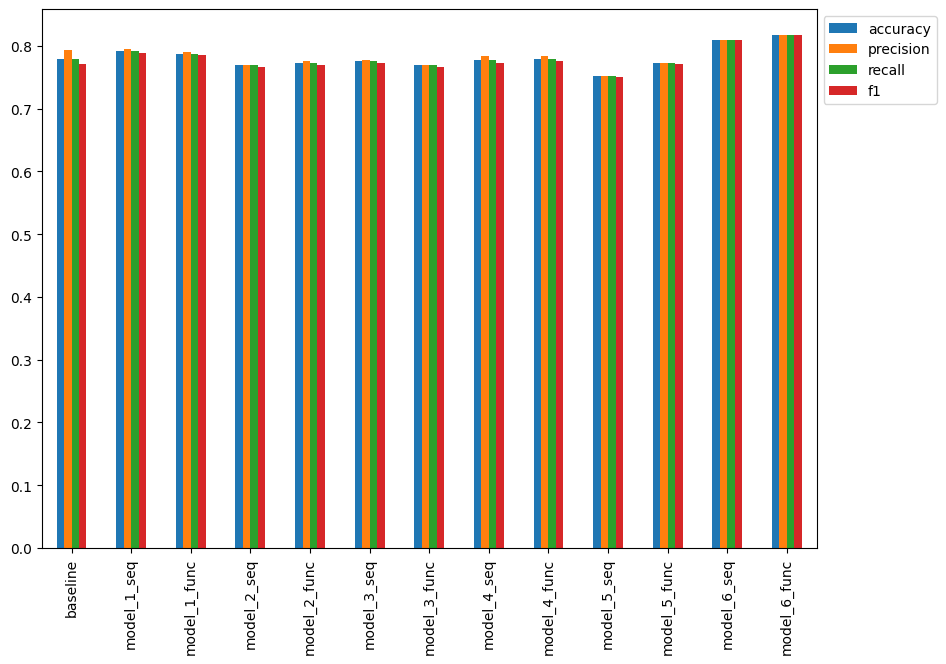

In [ ]:
all_model_results= pd.DataFrame({
    "baseline":baseline_results
    ,"model_1_seq": model_1_seq_results
    ,"model_1_func": model_1_func_results
    ,"model_2_seq": model_2_seq_results
    ,"model_2_func": model_2_func_results
    ,"model_3_seq": model_3_seq_results
    ,"model_3_func": model_3_func_results
    ,"model_4_seq": model_4_seq_results
    ,"model_4_func": model_4_func_results
    ,"model_5_seq": model_5_seq_results
    ,"model_5_func": model_5_func_results
    ,"model_6_seq": model_6_seq_results
    ,"model_6_func": model_6_func_results
})
all_model_results= all_model_results.transpose()
all_model_results["accuracy"]= all_model_results["accuracy"]/100
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

### Saving and Load Model

In [ ]:
# save model in .h5 format
model_6_seq.save("pretrained_embedding_model.h5")

In [ ]:
loaded_model_6_seq= tf.keras.models.load_model("pretrained_embedding_model.h5",
                                        custom_objects={"KerasLayer":hub.KerasLayer})

In [ ]:
# Evaluate loaded model
loaded_model_6_seq.evaluate(val_sent,val_target)